Import Libraries & Load the Data 
Ensure data loads correctly.
See column names, data types, and any missing values.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\weree\Desktop\Portfolios\Gym Churn\gym_membership_prediction_with_professional_status.csv")

# View first rows
print(df.head())
print(df.info())


   User ID  Age  Gender  Annual Income Membership Type  Membership Duration  \
0        1   62   Other         135305         Premium                   46   
1        2   65    Male          59056           Basic                   26   
2        3   18    Male          63857           Basic                   46   
3        4   21    Male         135072           Basic                   54   
4        5   21  Female          59344           Basic                   36   

   Frequency of Visit Preferred Time Previous Membership Marital Status  \
0                   2      Afternoon                 Yes        Married   
1                   6      Afternoon                 Yes         Single   
2                   2      Afternoon                  No        Married   
3                   1        Evening                  No        Married   
4                   5        Morning                 Yes         Single   

   Location Promotion Response Health Condition Membership Prediction  \
0

Data Cleaning for accurate results 

In [12]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # or use df.fillna(value)

# Remove duplicates
df = df.drop_duplicates()

# Confirm changes
print(df.shape)


User ID                  0
Age                      0
Gender                   0
Annual Income            0
Membership Type          0
Membership Duration      0
Frequency of Visit       0
Preferred Time           0
Previous Membership      0
Marital Status           0
Location                 0
Promotion Response       0
Health Condition         0
Membership Prediction    0
Professional             0
Professional Status      0
dtype: int64
(4000, 16)


Basic Descriptive Statistics-Understand membership and spending power

In [13]:
# Summary of numeric columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include='object'))


           User ID          Age  Annual Income  Membership Duration  \
count  4000.000000  4000.000000    4000.000000          4000.000000   
mean   2000.500000    43.633000   86346.917000            30.301500   
std    1154.844867    15.182669   38029.388846            16.832407   
min       1.000000    18.000000   20046.000000             1.000000   
25%    1000.750000    30.000000   53324.250000            16.000000   
50%    2000.500000    44.000000   86908.000000            31.000000   
75%    3000.250000    57.000000  120324.000000            45.000000   
max    4000.000000    69.000000  149980.000000            59.000000   

       Frequency of Visit  
count         4000.000000  
mean             3.500500  
std              1.709307  
min              1.000000  
25%              2.000000  
50%              3.000000  
75%              5.000000  
max              6.000000  
       Gender Membership Type Preferred Time Previous Membership  \
count    4000            4000           

Membership Retention Overview

Previous Membership
No     61.175
Yes    38.825
Name: proportion, dtype: float64


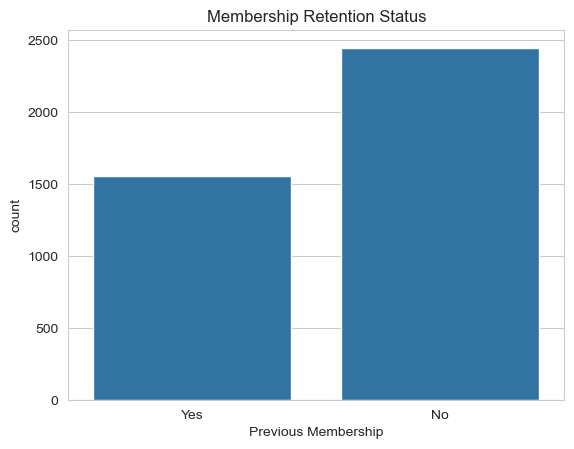

In [14]:
# Retention rate
retention_rate = df['Previous Membership'].value_counts(normalize=True) * 100
print(retention_rate)

# Visualization
sns.countplot(x='Previous Membership', data=df)
plt.title("Membership Retention Status")
plt.show()


 Demographic Insights (Age, Gender, Marital Status)

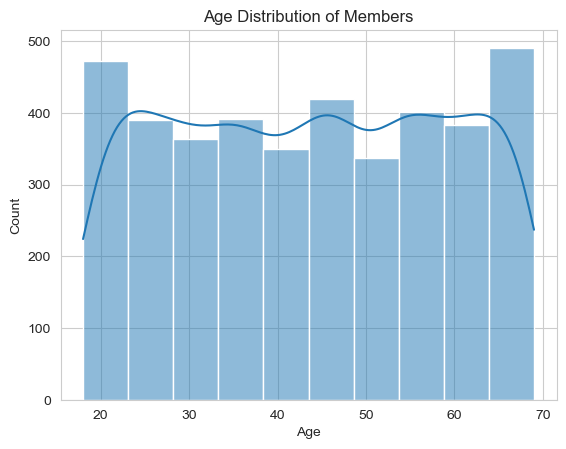

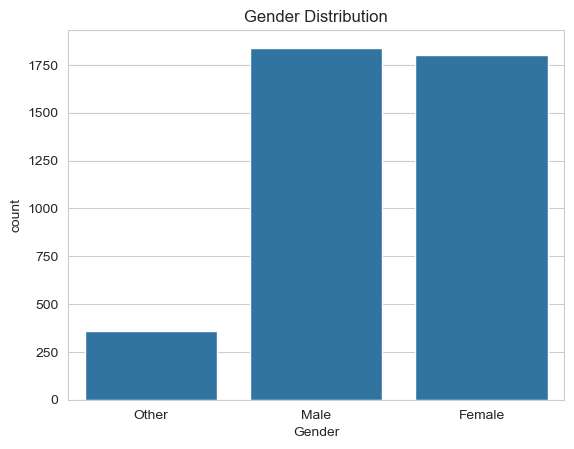

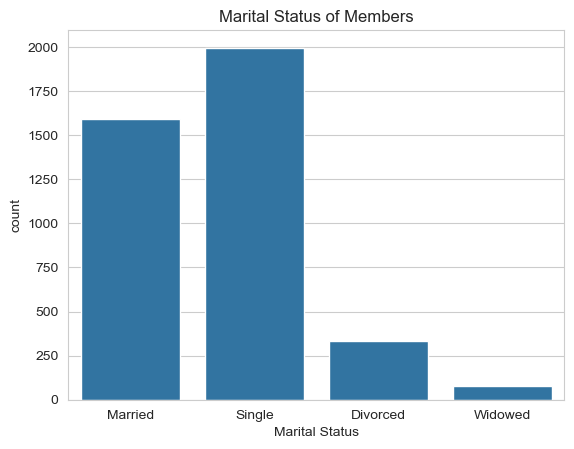

In [15]:
# Age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution of Members")
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Marital Status
sns.countplot(x='Marital Status', data=df)
plt.title("Marital Status of Members")
plt.show()


Engagement Analysis (Frequency of Visit & Preferred Time)

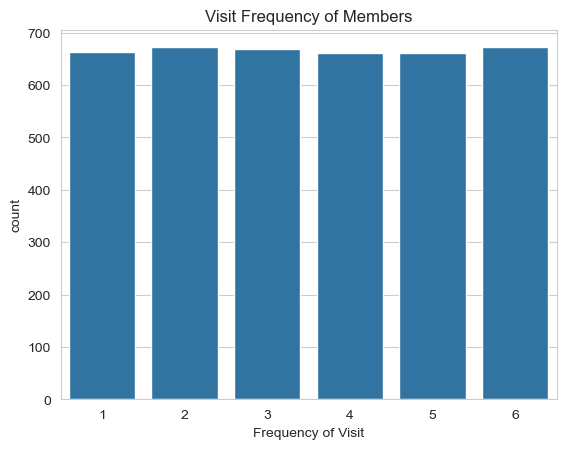

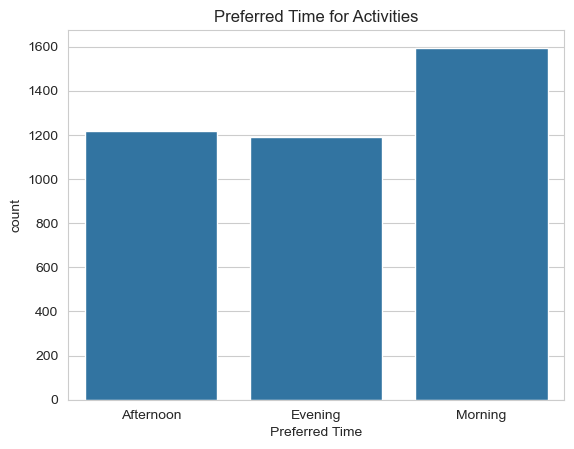

In [16]:
# Frequency of visit
sns.countplot(x='Frequency of Visit', data=df)
plt.title("Visit Frequency of Members")
plt.show()

# Preferred time
sns.countplot(x='Preferred Time', data=df)
plt.title("Preferred Time for Activities")
plt.show()


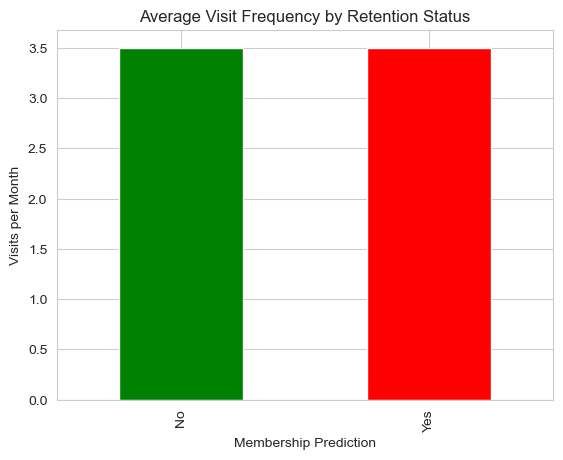

In [21]:
import matplotlib.pyplot as plt

freq_retention = df.groupby('Membership Prediction')['Frequency of Visit'].mean()
freq_retention.plot(kind='bar', color=['green', 'red'])
plt.title("Average Visit Frequency by Retention Status")
plt.ylabel("Visits per Month")
plt.show()


In [ ]:
Membership Retention Analysis 

In [22]:
retention_counts = df['Membership Prediction'].value_counts()
retention_rate = (retention_counts.get('Retained', 0) / retention_counts.sum()) * 100
print(f"Retention Rate: {retention_rate:.2f}%")

retention_by_gender = df.groupby('Gender')['Membership Prediction'].value_counts(normalize=True).unstack()
print(retention_by_gender)


Retention Rate: 0.00%
Membership Prediction        No       Yes
Gender                                   
Female                 0.502778  0.497222
Male                   0.491848  0.508152
Other                  0.483333  0.516667


Financial Insights (Annual Income & Membership Type)

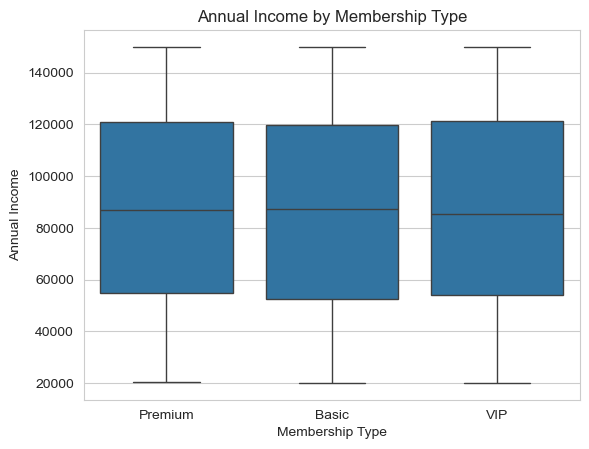

Membership Type
Basic      30.308546
Premium    30.858247
VIP        28.646766
Name: Membership Duration, dtype: float64


In [17]:
# Income vs membership type
sns.boxplot(x='Membership Type', y='Annual Income', data=df)
plt.title("Annual Income by Membership Type")
plt.show()

# Average membership duration
avg_duration = df.groupby('Membership Type')['Membership Duration'].mean()
print(avg_duration)


8 Marketing Insights (Promotion Response & Prediction)

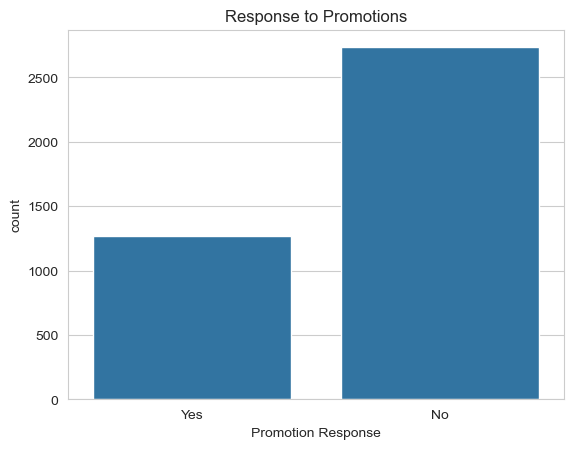

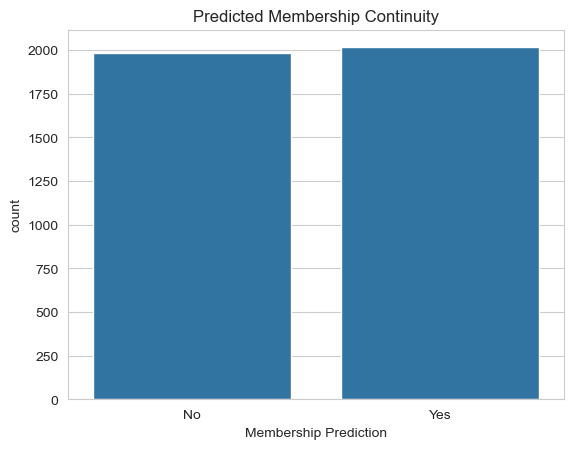

In [18]:
# Promotion Response
sns.countplot(x='Promotion Response', data=df)
plt.title("Response to Promotions")
plt.show()

# Membership Prediction breakdown
sns.countplot(x='Membership Prediction', data=df)
plt.title("Predicted Membership Continuity")
plt.show()


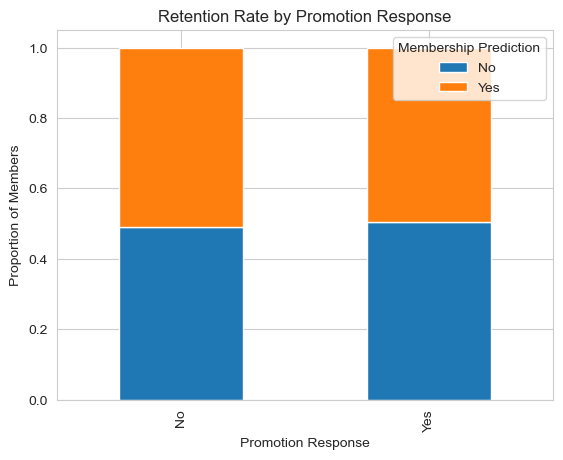

In [23]:
promo_effect = df.groupby('Promotion Response')['Membership Prediction'].value_counts(normalize=True).unstack()
promo_effect.plot(kind='bar', stacked=True)
plt.title("Retention Rate by Promotion Response")
plt.ylabel("Proportion of Members")
plt.show()


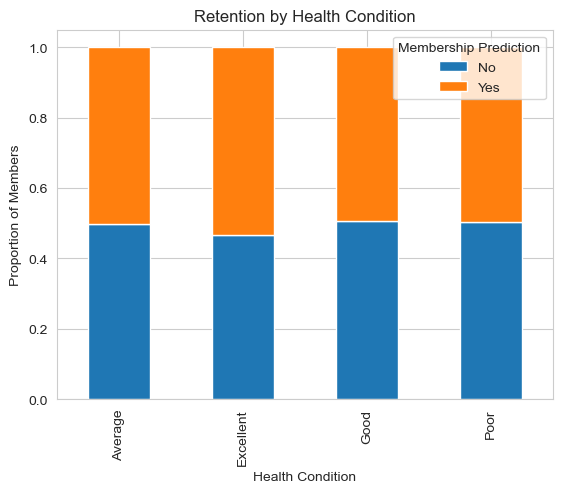

In [20]:
health_retention = df.groupby('Health Condition')['Membership Prediction'].value_counts(normalize=True).unstack()
health_retention.plot(kind='bar', stacked=True)
plt.title("Retention by Health Condition")
plt.ylabel("Proportion of Members")
plt.show()